Aims:
- Import flavin signals
- Process them
- Label them as oscillating, non-oscillating, or unsure if I haven't done it already
- Train SVM and evaluate its performance

Paradigms:
- Leverage `pandas`: ease transition to `stoa`, easier to manipulate with `scikit-learn`, cleaner code
- Discard unnecessary information (including births) & processes
- Ultimate goal to put the parameters in each cell together in a `dict` and put the code in a pipeline, like everything in `stoa`

**IMPORTANT NOTE: USE THE `stoa` VIRTUAL ENVIRONMENT**

# Import data

In [105]:
import numpy as np
import pandas as pd
import csv

# PARAMETERS
#filename_prefix = './data/arin/Omero19979_'
filename_prefix = './data/arin/Omero20016_'
#

# Import flavin signals
signal = pd.read_csv(filename_prefix+'flavin.csv')
signal.replace(0, np.nan, inplace=True) # because the CSV is constructed like that :/

# Import look-up table for strains (would prefer to directly CSV -> dict)
strainlookup_df = pd.read_csv(filename_prefix+'strains.csv')
strainlookup_dict = dict(zip(strainlookup_df.position, strainlookup_df.strain))

# Positions -> Strain (more informative)
signal = signal.replace({'position': strainlookup_dict})
signal.rename(columns = {"position": "strain"}, inplace = True)
signal = signal.drop(['distfromcentre'], axis = 1)

# Convert to multi-index dataframe
signal_temp = signal.iloc[:,2:]
multiindex = pd.MultiIndex.from_frame(signal[['strain', 'cellID']])
signal = pd.DataFrame(signal_temp.to_numpy(),
                      index = multiindex)

signal

0           1           2           3           4    \
strain   cellID                                                               
by4741   1              NaN         NaN    9.480315    9.429119         NaN   
         2              NaN         NaN         NaN         NaN         NaN   
         3        57.918136   55.205479   56.584071   53.850123   57.054362   
         4              NaN         NaN         NaN         NaN         NaN   
         5              NaN         NaN         NaN         NaN         NaN   
         6              NaN         NaN         NaN         NaN         NaN   
         7              NaN         NaN         NaN         NaN         NaN   
         8              NaN         NaN         NaN         NaN         NaN   
         9        35.108808   32.349462   32.722892   32.477723   35.306220   
         10             NaN         NaN         NaN         NaN         NaN   
         11       44.954323   45.079077   47.233010   48.314570   51.504854   
         12       46.830161   45.698813   47.038123   47.598240   50.848355   
         13       55.198872   53.515942   53.267705   56.092725   56.311989   
         14             NaN         NaN         NaN         NaN         NaN   
         15             NaN         NaN         NaN         NaN         NaN   
         16       49.953488   47.402299   55.721519   52.706667   56.434783   
         17             NaN         NaN         NaN         NaN         NaN   
         18       53.745602   51.174966   51.079622   51.752381   54.343124   
         19       49.548454   47.495708   48.088050   48.472165   49.362919   
         20             NaN         NaN         NaN         NaN         NaN   
         21       50.936281   49.921958   52.372859   53.971014   58.009138   
         22       48.367164   46.476048   47.685157   48.122963   52.961652   
         23       59.506686   56.707692   53.449254   51.312312   52.402675   
         24             NaN         NaN         NaN         NaN         NaN   
         25       50.124286   48.415363   51.600000   53.792079   57.387234   
         26             NaN         NaN         NaN         NaN         NaN   
         27             NaN         NaN         NaN         NaN         NaN   
         28       58.014870   55.830424   56.408468   59.115924   60.040293   
         29       40.657895   41.112500   42.777778   45.839506   51.921875   
         30       47.451935   47.263959   47.967866   47.336329   51.752564   
         31       62.235461   60.706304   60.360449   60.564067   64.563172   
         32             NaN         NaN         NaN         NaN         NaN   
         33       65.293578   63.356858   61.533955   60.731973   61.505929   
         34       41.319109   39.581006   39.683241   40.343985   42.956848   
         35             NaN         NaN         NaN         NaN         NaN   
         36             NaN         NaN         NaN         NaN         NaN   
         37       54.165554   52.161507   52.573727   54.481682   55.397333   
         38       70.263750   66.885327   64.721190   63.956468   66.362610   
         39       55.394366   53.836389   54.617647   54.498615   56.443409   
         40       35.507317   34.032415   35.726678   37.275000   39.115512   
         41       55.595930   51.020619   49.773256   50.526241   51.841958   
         42       55.243671   54.373802   54.779528   55.556619   58.803487   
         43             NaN         NaN         NaN         NaN         NaN   
         44             NaN         NaN         NaN         NaN         NaN   
         45       59.374474   58.172269   59.715076   60.949930   63.668956   
         46             NaN         NaN         NaN         NaN         NaN   
         47       67.265888   65.390276   63.514436   64.392523   64.591029   
         48       62.460591   59.967662   60.769890   61.866585   63.843636   
         49       42.475649   41.903172   41.288779   42.540134   43.01140

# Choose a list of cells as working data

List strains

In [106]:
signal.index.get_level_values(0).unique().to_list()

['by4741', 'zwf1_Del']

Define `signal_wd` as working data

In [107]:
signal_wd = signal.loc['by4741']

signal_wd

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
cellID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,9.480315,9.429119,NaN,NaN,9.203125,7.494845,9.463415,NaN,...,9.922794,10.750890,9.390335,10.180556,10.780405,10.255245,10.052632,11.029126,11.238754,10.512195
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.581121,5.628809,5.983003,7.284574,4.461095,6.156499,6.886740,3.889205,4.655367,4.316716
3,57.918136,55.205479,56.584071,53.850123,57.054362,56.503113,59.147132,58.975460,59.396825,60.500000,...,32.385949,32.379121,31.372958,31.532779,30.330333,30.652174,29.643376,30.059729,29.971818,30.314155
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.373050,29.799431,30.110000,29.966339,29.402857,30.160920,30.076487,28.743516,29.810072,29.117647
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.561462,NaN,20.446809,...,32.517192,30.927407,30.176211,27.892308,28.759388,27.874832,27.585695,27.060893,26.833561,27.551630
7,NaN,NaN,NaN,NaN,NaN,67.128635,67.302142,66.596392,64.529748,62.729425,...,40.267210,40.092308,39.145307,38.751993,39.657066,39.662555,38.886506,38.791099,39.144914,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.100907,31.967963,31.856655,31.642286,30.501691,30.708760,30.824943,29.915235,29.759954,NaN
9,35.108808,32.349462,32.722892,32.477723,35.306220,33.048165,34.411765,32.800915,33.146172,33.288330,...,14.998314,14.376667,15.902027,17.837979,16.671930,16.799302,17.363167,16.915966,16.448630,16.382943


# Processing time series

## Range

Chop up time series according to `interval_start` and `interval_end`, then remove cells that have NaNs.  Print number of cells.

In [108]:
# PARAMETERS
interval_start = 25
interval_end = 168
#

signal_processed = signal_wd.iloc[:, interval_start:interval_end].dropna()

signal_processed

,25,26,27,28,29,30,31,32,33,34,...,158,159,160,161,162,163,164,165,166,167
cellID,,,,,,,,,,,,,,,,,,,,,
1,10.188088,8.370000,8.182109,10.861953,10.842105,9.957895,11.173913,10.509868,9.680782,11.835017,...,10.859206,10.189655,9.095057,10.409677,9.880795,10.045902,11.768254,8.674074,11.395270,9.531561
2,7.326087,3.928358,9.608142,4.831909,9.521519,8.417989,5.833803,7.689295,7.096354,7.598901,...,3.896067,5.784574,6.230563,6.062842,5.558904,5.997167,5.616438,5.122507,4.747191,6.138028
3,55.188249,56.789855,59.521525,60.626087,59.268999,59.514388,57.447527,58.381885,57.696894,55.769139,...,38.102564,37.949203,34.303186,34.667345,34.572283,34.759295,37.174384,37.637864,37.772682,37.434696
4,48.128713,48.769357,47.862715,50.566303,54.275316,56.129187,56.200658,58.372771,58.733871,60.413462,...,47.170819,47.425178,47.292978,45.116646,41.136471,40.875740,38.595545,39.606690,39.567857,41.467609
7,59.498364,58.608315,59.362335,58.906482,60.440387,61.006479,60.626596,60.387397,58.046660,57.742424,...,47.619279,47.696360,48.000961,47.463087,46.669166,47.611524,50.335835,50.285714,50.472486,50.634966
8,35.484902,34.992883,35.386364,35.676106,37.518010,37.160202,36.595357,39.537801,38.630719,41.039669,...,32.464607,31.967825,31.470513,30.529860,30.728535,30.693727,32.585834,34.078408,35.971570,33.779412
11,48.527197,46.343056,49.385576,49.772346,48.935262,49.064426,47.220000,44.761194,44.748344,44.903279,...,39.967742,39.995396,39.783270,38.514890,37.994220,37.485793,37.724953,37.075914,35.485167,35.433858
13,45.243836,45.475871,47.668428,46.974700,48.882275,49.014342,50.838501,50.383784,49.441176,48.397039,...,37.380435,37.582609,36.760965,34.916395,33.398907,32.155191,31.306297,32.342672,32.554011,32.700855
16,47.800000,49.507692,46.093333,45.256757,45.551282,45.925926,48.565789,46.525641,48.205128,49.328358,...,44.071429,38.936709,42.871795,39.408451,40.527778,39.240000,39.746667,43.333333,41.086420,39.313253


## Detrend

Using sliding window (Alán)

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# PARAMETERS
window = 45
#

fig, ax = plt.subplots()
sns.heatmap(signal_processed)
plt.title('Before detrending')
plt.show()

def moving_average(input_timeseries,
                  window = 3):
    processed_timeseries = np.cumsum(input_timeseries, dtype=float)
    processed_timeseries[window:] = processed_timeseries[window:] - processed_timeseries[:-window]
    return processed_timeseries[window - 1 :] /  window

signal_processed = signal_processed.div(signal_processed.mean(axis = 1), axis = 0)
signal_movavg = signal_processed.apply(lambda x: pd.Series(moving_average(x.values, window)), axis = 1)
signal_norm = signal_processed.iloc(axis = 1)[window//2: -window//2] / signal_movavg.iloc[:,0:signal_movavg.shape[1]-1].values

fig, ax = plt.subplots()
sns.heatmap(signal_norm)
plt.title('After detrending')
plt.show()

signal_processed = signal_norm

signal_processed

,47,48,49,50,51,52,53,54,55,56,...,135,136,137,138,139,140,141,142,143,144
cellID,,,,,,,,,,,,,,,,,,,,,
1,0.973198,1.092343,0.768610,0.909351,0.902878,0.913589,0.907760,0.953970,0.976321,0.927106,...,0.959956,0.979921,0.872617,0.887671,1.007656,1.015434,0.994656,0.941609,0.999758,0.999177
2,0.888399,1.044321,1.140201,1.099578,0.982392,1.329958,1.462136,1.441086,1.251018,0.998597,...,1.096482,0.861738,0.812504,0.643598,1.021576,1.218797,1.127622,0.891286,0.936456,0.899465
3,1.008072,0.995746,0.998329,0.959096,0.949013,0.949387,0.972755,0.957707,0.997107,1.005475,...,0.968964,0.959499,0.962344,0.993584,1.018883,1.037046,1.031198,1.013971,1.033734,1.008298
4,1.010230,1.011736,1.026106,0.994571,0.950429,0.970776,0.961961,0.968383,0.952873,0.939880,...,0.944960,0.870582,0.893523,0.912509,0.963982,0.994208,1.005112,1.021730,1.029035,1.045483
7,0.950023,0.951828,0.960424,0.951358,0.995999,1.002698,1.050372,1.037176,1.058654,1.053875,...,0.991796,0.982635,0.958508,0.904693,1.003046,0.991774,0.931077,0.946629,0.970053,0.963113
8,0.859619,0.872667,0.896596,0.947826,0.986579,1.039622,0.998084,0.987933,1.046518,1.064947,...,1.073633,1.124055,1.121279,1.099028,1.135194,0.997816,1.002334,0.969078,1.008227,0.931053
11,0.916303,0.913491,0.892228,0.926636,0.908509,0.876690,0.843550,0.914275,0.973740,0.982235,...,1.018637,0.989714,0.950980,0.926112,0.934252,0.940736,0.988053,1.023749,1.000155,1.018993
13,1.050251,1.032493,1.016167,0.990485,0.988060,0.988873,0.977494,0.929520,0.939874,0.914184,...,1.056440,1.046960,1.010945,1.010075,0.987408,0.993606,0.988772,0.978659,0.988205,0.925676
16,1.027360,1.005716,0.974292,0.987577,0.989131,0.998182,0.980715,0.974355,1.058187,1.012363,...,1.004655,0.985051,0.966218,0.975947,0.992349,1.012596,1.011247,0.986820,1.004354,0.952940


## Normalisation

Option 1: ...

In [196]:
# code

# Assign labels (if not already done)

Assign labels by scoring oscillations (human), and save scores

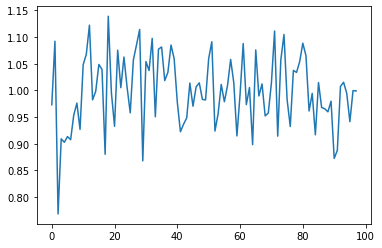

Is this oscillatory?: 0


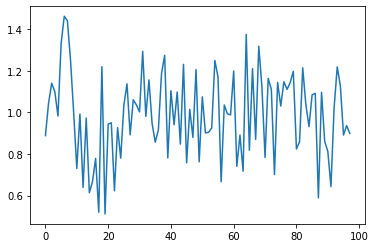

Is this oscillatory?: 0


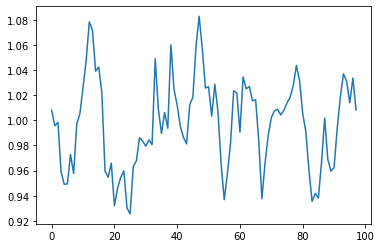

Is this oscillatory?: 1


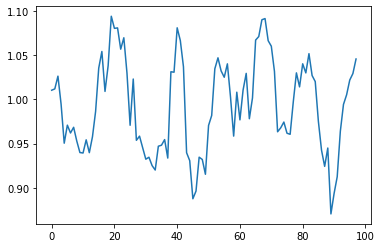

Is this oscillatory?: 1


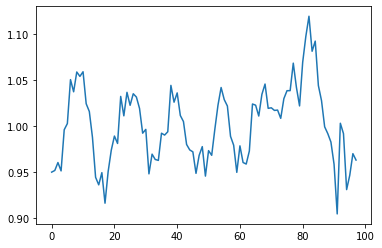

Is this oscillatory?: 1


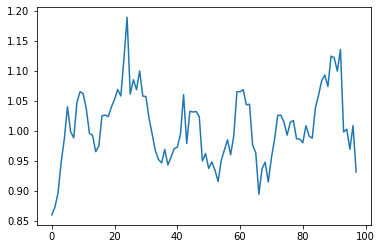

Is this oscillatory?: 1


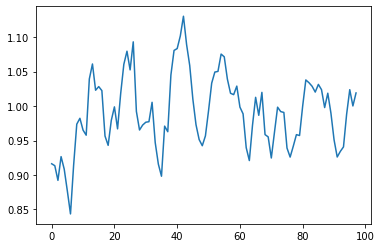

Is this oscillatory?: 1


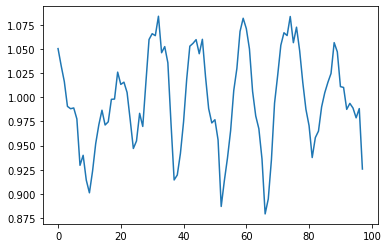

Is this oscillatory?: 1


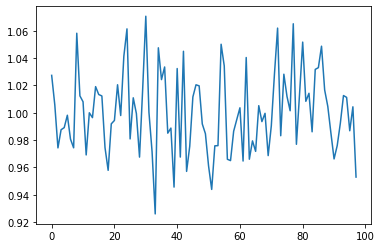

Is this oscillatory?: 0


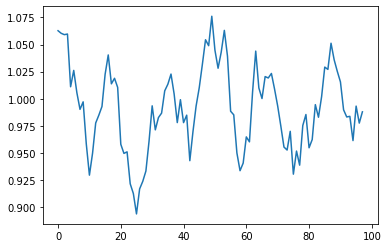

Is this oscillatory?: 1


In [16]:
%matplotlib inline

# PARAMETERS
filename_category = 'test.csv'
#

category_list = []
for timeseries in signal_processed.to_numpy():
    plt.plot(timeseries)
    plt.show(block=False)
    category = input('Is this oscillatory?: ')
    category_list.append(category)
category_df = pd.DataFrame(category_list, index = signal_processed.index)
category_df.to_csv(filename_category, index=True)

Or, randomise scores and save them

In [21]:
# PARAMETERS
filename_category = 'random.csv'
category_labels = [0,1,2]
weights = [51/294, 135/294, 108/294]
#category_labels = [0,1]
#weights = [83/294, 211/294]
#

category_df = pd.DataFrame(
    [np.random.choice(category_labels, 1, p=weights) for i in range(len(signal_processed))],
    index = signal_processed.index
)
category_df.to_csv(filename_category, index=True)

# Featurisation

TODO: Make choice of feature some kind of parameter within the overarching pipeline

Option 1: Use `catch22`

In [110]:
from postprocessor.core.processes.catch22 import catch22Parameters, catch22

catch22_processor = catch22(catch22Parameters.default())
features = catch22_processor.run(signal_processed)

sns.heatmap(features)

<AxesSubplot:ylabel='cellID'>

Option 2: FFT spectrum

(Caution: there may be slight variations between this and the old notebook -- could be yet-to-be-debugged different behaviour in `postprocessor.core.processes.fft`)

In [19]:
from postprocessor.core.processes.fft import fftParameters, fft

fft_processor = fft(fftParameters.default())
_, features = fft_processor.run(signal_processed)

sns.heatmap(features)

<AxesSubplot:ylabel='cellID'>

# Classifier pipeline

In [111]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, roc_auc_score

# PARAMETERS
filename_targets = 'categories_svm_window.csv'
train_size = 150
#

# (add import, processing)

# (add featurisation)

# Import target values
targets = pd.read_csv(filename_targets, header = None, index_col = 0)
targets.index.names = ['cellID']
targets = targets.to_numpy().flatten()

## TODO: option to remove class 2 ones if three classes defined but I want a binary classifier

# Create classifier (pipeline)
classifier = make_pipeline(
    StandardScaler(),
    SVC(gamma='auto', probability=True),
)

# Split training & testing
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets,
    train_size = train_size,
)

## TODO: implement expanded testing list in the case I want a binary classifier but the data was classified into three classes.

# Fit
classifier.fit(features_train, targets_train)

# Predict categories
targets_predicted = classifier.predict(features_test)
# Print cellIDs predicted to be in each category
predictions_dict = {}
for class_label in set(targets):
    predictions_dict[class_label] = features_test.iloc[targets_predicted == class_label].index.to_numpy()
print('Predictions')
print(predictions_dict)

# Get probabilities
targets_proba = classifier.predict_proba(features_test)
pd.set_option('display.max_rows', None)
targets_proba_df = pd.DataFrame(targets_probabilities, index = features_test.index)
targets_proba_df.sort_values(by=[1]) # sorted by probability of oscillation
# Plot histogram of probabilities
fig, ax = plt.subplots()
plt.hist(targets_proba_df.iloc[:,1], 40)
plt.title('Histogram of probabilities')
plt.xlabel('Probability of oscillation')
plt.ylabel('Frequency')

## TODO: visualisations of time series & feature vectors of each group

# Verify by doing it again with k-fold cross-validation
kf = StratifiedKFold(n_splits = 5)
print('k-fold cross-validation')
for train_index, test_index in kf.split(features, targets):
    # Split training-testing
    features_train_kf, features_test_kf = features.iloc[train_index], features.iloc[test_index]
    targets_train_kf, targets_test_kf = targets[train_index], targets[test_index]
    
    # Train & predict
    classifier.fit(features_train_kf, targets_train_kf)
    targets_predicted_kf = classifier.predict(features_test_kf)
    
    # Compute measures
    print(
        'Precision ' +
        '%.4f' % precision_score(targets_test_kf, targets_predicted_kf, average='weighted') +
        ' Recall ' +
        '%.4f' % recall_score(targets_test_kf, targets_predicted_kf, average='weighted')
        )

# ROC curve (WORK IN PROGRESS)
scores = targets_proba_df.iloc[:,1]
false_positive_rate, true_positive_rate, _ = roc_curve(targets_test, scores)
fig, ax = plt.subplots()
plt.plot(false_positive_rate, true_positive_rate)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

Predictions
{0.0: array([315, 183, 390,   1, 329, 160, 228, 322, 309, 334, 214, 146, 313,
       333, 224,  16, 348, 179, 359, 300, 394, 204]), 1.0: array([ 90,  33, 143, 347,  85,  74, 285, 132, 151, 383, 338, 172, 393,
        38,  62, 175, 140, 268, 246, 127, 233, 374, 134, 159,  20,  54,
        97, 311, 264,  83,  61, 169, 195, 283, 164, 144, 104,  77, 187,
       299,  23,  78, 174, 340, 281,  31,  47, 295, 168, 128,  81, 201,
       106,  86, 286, 270,  99, 155, 372, 205, 120, 130, 337, 125, 380,
       288, 250,  28, 131, 279, 124, 145,  65,  11, 377, 126, 353, 191,
       141, 265,  60, 275, 312, 373,  49, 119,  57,  69, 232, 327, 133,
       236, 325,  29,  40,  21,  67, 105, 324, 278, 158, 336, 148, 196,
        87,  13,  30, 211, 364,  84,  39, 101, 355, 238, 203,  66,  50,
        82, 118, 251, 188,  68])}
k-fold cross-validation
Precision 0.9108 Recall 0.8983
Precision 0.8346 Recall 0.8305
Precision 0.8426 Recall 0.8475
Precision 0.8992 Recall 0.8983
Precision 0.9310 Reca

Text(0, 0.5, 'true positive rate')

In [19]:
# Do something with this thing

Wlist_backup_MATLABids = [cell.MATLABid for cell in Wlist_backup]
Traininglist_MATLABids = [cell.MATLABid for cell in Traininglist]

Testinglist_expanded = [cell for cell in Wlist_backup if cell.MATLABid not in Traininglist_MATLABids]

testing_data_expanded = np.array([cell.flavin.feature_vector for cell in Testinglist_expanded])

len(set(Testinglist_expanded))

194